## Task-1 Data Preparation 

## 1.1 Filter high value customer

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Telecom_Churn_Data.csv.csv")  # Adjust the file path

# Display the first few rows of the dataset 
print(df.head())

   mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6  ...  sachet_3g_9  fb_user_6  fb_user_7  \
0            9/30/2014  197.385  ...     

In [3]:
print(df.columns)

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)


In [6]:
[col for col in df.columns if "rech" in col.lower()]

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

In [8]:
# Define the correct recharge columns for the first two months
recharge_columns = ["total_rech_amt_6", "total_rech_amt_7"]

# Calculate the average recharge amount per user for months 6 & 7
df["avg_rech_amt"] = df[recharge_columns].mean(axis=1)

# Compute the 70th percentile (X) of the average recharge amount
X = df["avg_rech_amt"].quantile(0.70)

# Filter high-value customers (those with avg_rech_amt >= X)
df_high_value = df[df["avg_rech_amt"] >= X]

# Check the number of rows
print(f"Number of high-value customers: {len(df_high_value)}")

Number of high-value customers: 30011


## 1.2 Tag churner and remove attributes of the churn phase 

In [10]:
# Ensure we start with the full dataset
recharge_columns = ["total_rech_amt_6", "total_rech_amt_7"]
df["avg_rech_amt"] = df[recharge_columns].mean(axis=1)
X = df["avg_rech_amt"].quantile(0.70)
df_high_value = df[df["avg_rech_amt"] >= X]

In [13]:
# Check if churn phase columns exist before proceeding
churn_columns = ["total_ic_mou_9", "total_og_mou_9", "vol_2g_mb_9", "vol_3g_mb_9"]
missing_columns = [col for col in churn_columns if col not in df_high_value.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    # Tag churners before dropping columns
    df_high_value["churn"] = ((df_high_value["total_ic_mou_9"] == 0) &
                              (df_high_value["total_og_mou_9"] == 0) &
                              (df_high_value["vol_2g_mb_9"] == 0) &
                              (df_high_value["vol_3g_mb_9"] == 0)).astype(int)

    # Remove all columns from the churn phase (ending with '_9')
    df_high_value = df_high_value[df_high_value.columns[~df_high_value.columns.str.endswith("_9")]]

    # Check churn distribution
    print(df_high_value["churn"].value_counts())

churn
0    27418
1     2593
Name: count, dtype: int64


C:\Users\hp\AppData\Local\Temp\ipykernel_9012\168913934.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_value["churn"] = ((df_high_value["total_ic_mou_9"] == 0) &


## Task-2 Preprocessing and Feature Engineering

## 2.1 Handle Missing Data

In [22]:
# Check missing values
missing_values = df_high_value.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(missing_values)

max_rech_data_6             18614
date_of_last_rech_data_6    18614
count_rech_3g_6             18614
av_rech_amt_data_6          18614
arpu_3g_6                   18614
                            ...  
date_of_last_rech_7           114
loc_ic_t2o_mou                114
loc_og_t2o_mou                114
date_of_last_rech_6            62
last_date_of_month_7           31
Length: 125, dtype: int64


In [24]:
# 1️⃣ Drop columns with >30% missing values
threshold = 0.3 * len(df_high_value)
cols_to_drop = missing_values[missing_values > threshold].index.tolist()
df_high_value.drop(columns=cols_to_drop, inplace=True)

# 2️⃣ Fill missing values in numeric columns with median
numeric_cols = df_high_value.select_dtypes(include=['number']).columns
df_high_value[numeric_cols] = df_high_value[numeric_cols].fillna(df_high_value[numeric_cols].median())

# 3️⃣ Fill missing values in categorical columns with mode (if any exist)
categorical_cols = df_high_value.select_dtypes(include=['object']).columns
df_high_value[categorical_cols] = df_high_value[categorical_cols].fillna(df_high_value[categorical_cols].mode().iloc[0])

# Check if any missing values remain
print(df_high_value.isnull().sum().sum())  # Should print 0 if all missing values are handled

0


## 2.2 Feature Scaling or Standardization

In [31]:
from sklearn.preprocessing import StandardScaler

# 1️⃣ Select numeric columns (excluding churn)
numeric_cols = df_high_value.select_dtypes(include=['number']).columns
numeric_cols = numeric_cols.drop("churn", errors="ignore")  # Exclude churn column

# 2️⃣ Apply StandardScaler
scaler = StandardScaler()
df_high_value[numeric_cols] = scaler.fit_transform(df_high_value[numeric_cols])

# 3️⃣ Verify scaling (mean should be ~0, std ~1)
print(df_high_value[numeric_cols].describe().T[['mean', 'std']])

                        mean       std
mobile_number  -1.473218e-13  1.000017
circle_id       0.000000e+00  0.000000
loc_og_t2o_mou  0.000000e+00  0.000000
std_og_t2o_mou  0.000000e+00  0.000000
loc_ic_t2o_mou  0.000000e+00  0.000000
...                      ...       ...
aug_vbc_3g     -1.290346e-17  1.000017
jul_vbc_3g     -7.321827e-17  1.000017
jun_vbc_3g     -3.196270e-17  1.000017
sep_vbc_3g      7.576345e-18  1.000017
avg_rech_amt   -8.428683e-17  1.000017

[137 rows x 2 columns]


## 2.3 Handling Multicollinearity using VIF

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

# 1️⃣ Drop 'churn' & 'mobile_number' (not used in VIF calculation)
X = df_high_value.drop(columns=["churn", "mobile_number"], errors="ignore")

# 2️⃣ Keep only numeric columns
X = X.select_dtypes(include=[np.number])

# 3️⃣ Handle NaN and infinite values
X = X.replace([np.inf, -np.inf], np.nan)  # Convert infinities to NaN
X = X.dropna(axis=1, how="all")  # Drop columns where all values are NaN
X = X.dropna(axis=0)  # Drop rows with NaN

# 4️⃣ Remove constant columns (zero variance)
X = X.loc[:, X.var() > 0]

# 5️⃣ Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# 6️⃣ Display sorted VIF values
print(vif_data.sort_values(by="VIF", ascending=False))

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                Feature           VIF
125        avg_rech_amt           inf
94     total_rech_amt_7           inf
93     total_rech_amt_6           inf
41         std_og_mou_8  1.582348e+10
40         std_og_mou_7  1.334325e+10
..                  ...           ...
100  last_day_rch_amt_7  1.844224e+00
26     loc_og_t2c_mou_8  1.704235e+00
24     loc_og_t2c_mou_6  1.571072e+00
120                 aon  1.237352e+00
124          sep_vbc_3g  1.087003e+00

[126 rows x 2 columns]


In [40]:
# Drop features with 'inf' VIF (perfect collinearity)
high_vif_features = vif_data[vif_data["VIF"] > 10]["Feature"].tolist()
df_high_value = df_high_value.drop(columns=high_vif_features, errors="ignore")

# Recalculate VIF after removing highly correlated features
X = df_high_value.drop(columns=["churn", "mobile_number"], errors="ignore").select_dtypes(include=[np.number])
X = X.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
X = X.loc[:, X.var() > 0]  # Remove zero variance columns

# Compute new VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display sorted VIF values
print(vif_data.sort_values(by="VIF", ascending=False))

               Feature       VIF
19         vol_3g_mb_7  6.242405
20         vol_3g_mb_8  5.483350
18         vol_3g_mb_6  4.379728
35          jul_vbc_3g  3.772016
28        monthly_3g_7  3.580123
7     total_rech_num_7  3.385016
29        monthly_3g_8  3.252476
34          aug_vbc_3g  3.102358
31         sachet_3g_7  3.060143
25         sachet_2g_7  2.991285
36          jun_vbc_3g  2.879288
27        monthly_3g_6  2.849789
16         vol_2g_mb_7  2.834741
11      max_rech_amt_8  2.779681
8     total_rech_num_8  2.713463
9       max_rech_amt_6  2.430776
24         sachet_2g_6  2.424412
32         sachet_3g_8  2.261618
26         sachet_2g_8  2.226127
30         sachet_3g_6  2.216574
17         vol_2g_mb_8  2.178560
15         vol_2g_mb_6  2.149912
10      max_rech_amt_7  2.138441
22        monthly_2g_7  2.039887
14  last_day_rch_amt_8  2.009410
6     total_rech_num_6  1.997286
21        monthly_2g_6  1.930421
23        monthly_2g_8  1.896726
12  last_day_rch_amt_6  1.856452
1        r

## Task-3 Model Selection

## 3.1 Logistic Regression for Churn Prediction

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# 1️⃣ Select Features & Target
X = df_high_value[vif_data["Feature"]]
y = df_high_value["churn"]

# 2️⃣ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 3️⃣ Train Logistic Regression Model
model = LogisticRegression(max_iter=1000, class_weight="balanced")  # Handle class imbalance
model.fit(X_train, y_train)

# 4️⃣ Predictions & Evaluation
y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 5️⃣ Get Feature Importance
importance = abs(model.coef_[0])
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": importance})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

print("\nTop Important Features:\n", feature_importance.head(10))

Confusion Matrix:
 [[6390 1836]
 [ 162  616]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.78      0.86      8226
           1       0.25      0.79      0.38       778

    accuracy                           0.78      9004
   macro avg       0.61      0.78      0.62      9004
weighted avg       0.91      0.78      0.82      9004


Top Important Features:
                Feature  Importance
37          sep_vbc_3g    2.655261
8     total_rech_num_8    1.414056
14  last_day_rch_amt_8    0.671388
29        monthly_3g_8    0.540419
23        monthly_2g_8    0.494837
7     total_rech_num_7    0.487402
33                 aon    0.447381
2        roam_ic_mou_8    0.349197
26         sachet_2g_8    0.314139
6     total_rech_num_6    0.285146


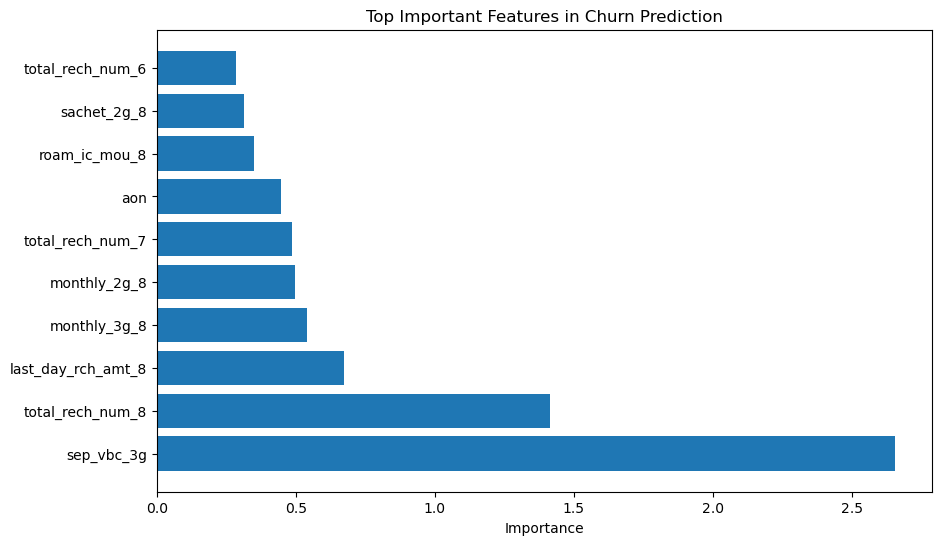

               Feature  Importance
37          sep_vbc_3g    2.655261
8     total_rech_num_8    1.414056
14  last_day_rch_amt_8    0.671388
29        monthly_3g_8    0.540419
23        monthly_2g_8    0.494837
7     total_rech_num_7    0.487402
33                 aon    0.447381
2        roam_ic_mou_8    0.349197
26         sachet_2g_8    0.314139
6     total_rech_num_6    0.285146


In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the absolute values of coefficients to rank feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': abs(model.coef_[0])
})

# Sort the features by importance
top_features = feature_importance.sort_values(by='Importance', ascending=False).head(10)

# Plot the top features
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importance')
plt.title('Top Important Features in Churn Prediction')
plt.show()

# Display the top features
print(top_features)

In [52]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Fit SMOTE to the training data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train the logistic regression model again using resampled data
model_smote = LogisticRegression(max_iter=1000, random_state=42)
model_smote.fit(X_resampled, y_resampled)

# Evaluate the model performance
y_pred_smote = model_smote.predict(X_test)

## 3.2  Random Forest/XGBoost (for higher accuracy & feature selection)

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)

# Performance metrics
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      8226
           1       0.67      0.38      0.49       778

    accuracy                           0.93      9004
   macro avg       0.81      0.68      0.72      9004
weighted avg       0.92      0.93      0.92      9004

[[8079  147]
 [ 480  298]]


In [57]:
y_pred_prob = model_smote.predict_proba(X_test)[:, 1]
y_pred_adjusted = (y_pred_prob > 0.4).astype(int)  # Lower threshold to catch more churners
print(classification_report(y_test, y_pred_adjusted))

              precision    recall  f1-score   support

           0       0.98      0.68      0.81      8226
           1       0.20      0.83      0.32       778

    accuracy                           0.70      9004
   macro avg       0.59      0.76      0.56      9004
weighted avg       0.91      0.70      0.76      9004



## Task-3 Model Training & Evaluation 

## 3.1 Train Models on Balanced Data using SMOTE

In [60]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print(f"Original train set size: {X_train.shape[0]}")
print(f"Balanced train set size: {X_train_balanced.shape[0]}")

Original train set size: 21007
Balanced train set size: 38374


## 3.2 Evaluate the Model using AUC-ROC, Precision-Recall, F1-score

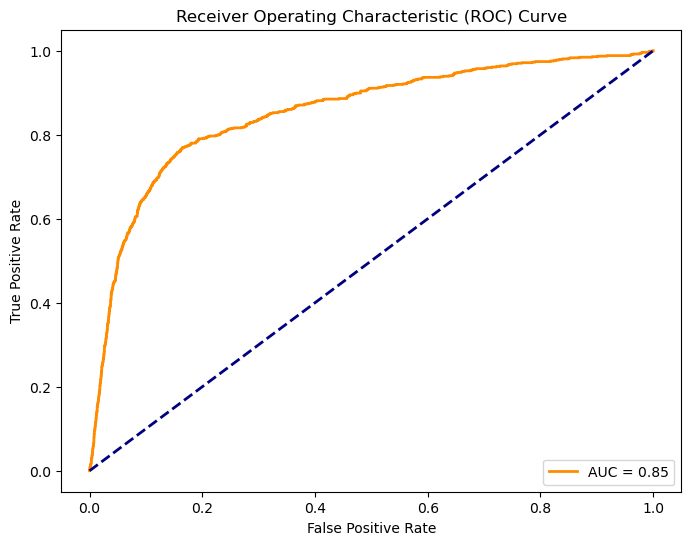

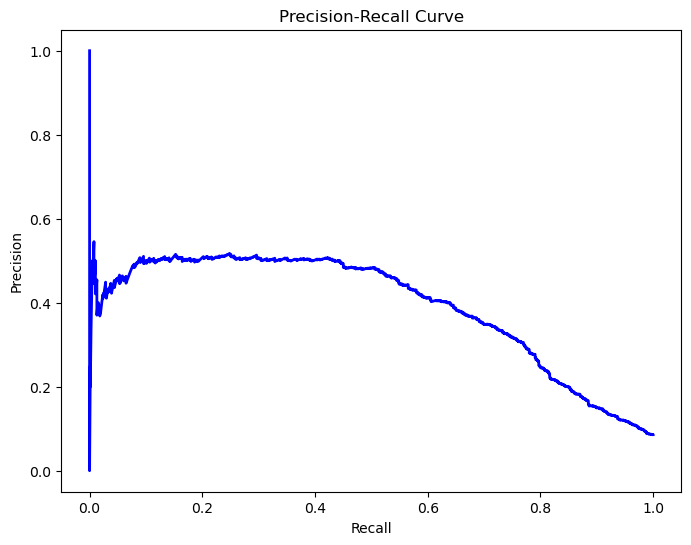

F1-Score: 0.3969


In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_recall_curve, f1_score
import matplotlib.pyplot as plt

# Train the logistic regression model on the balanced data
model_lr = LogisticRegression(random_state=42, max_iter=1000)
model_lr.fit(X_train_balanced, y_train_balanced)

# Predict probabilities for AUC-ROC and precision-recall evaluation
y_pred_prob = model_lr.predict_proba(X_test)[:, 1]
y_pred = model_lr.predict(X_test)

# 1. AUC-ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 2. Precision-Recall Curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# 3. F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.4f}")

## 3.3 Tune Hyperparameters with GridSearchCV or RandomizedSearchCV

Best Parameters: {'C': 100, 'max_iter': 100, 'solver': 'lbfgs'}


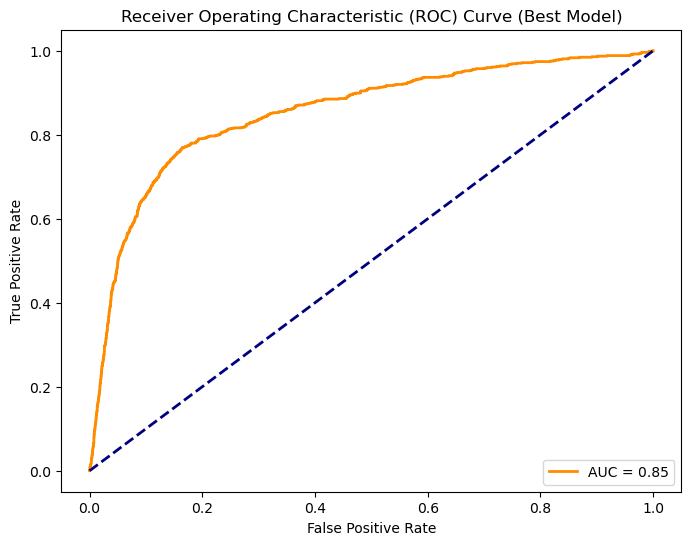

In [68]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 200, 300]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit grid search
grid_search.fit(X_train_balanced, y_train_balanced)

# Print best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model from grid search
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
y_pred_prob_best = best_model.predict_proba(X_test)[:, 1]

# Calculate the AUC-ROC for the tuned model
fpr_best, tpr_best, _ = roc_curve(y_test, y_pred_prob_best)
roc_auc_best = auc(fpr_best, tpr_best)

plt.figure(figsize=(8, 6))
plt.plot(fpr_best, tpr_best, color='darkorange', lw=2, label='AUC = %0.2f' % roc_auc_best)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Best Model)')
plt.legend(loc="lower right")
plt.show()

## Task-4 Feature Importance & Visualization

## 4.1 Logistic Regression Coefficients (Feature Importance)

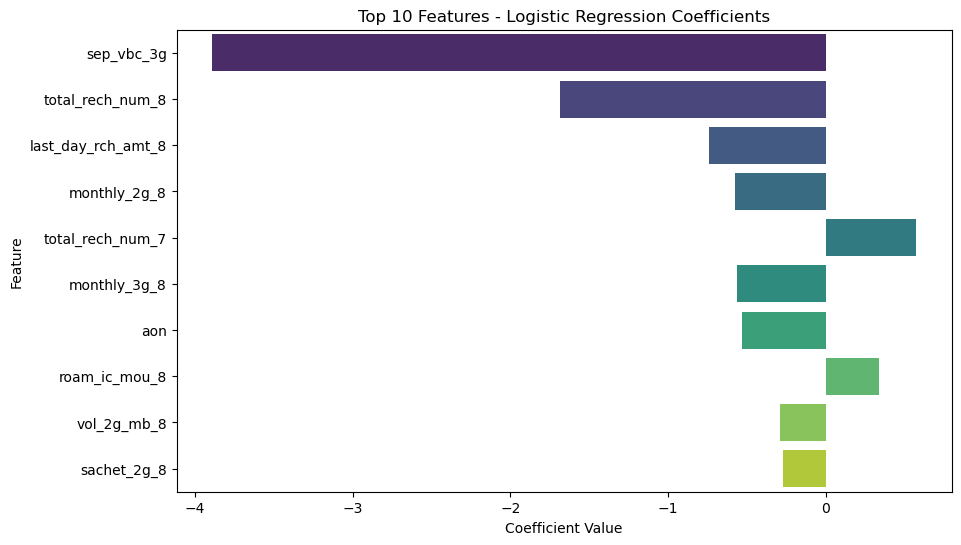

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Extract coefficients from the logistic regression model
coefficients = model_smote.coef_[0]
features = X_train.columns

# Create a DataFrame for easier visualization
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

# Sort by absolute coefficient values to show the most important features
coef_df['abs_coef'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='abs_coef', ascending=False)

# Plot top 10 features based on absolute coefficient value
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df.head(10), palette="viridis")
plt.title("Top 10 Features - Logistic Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

## 4.2 Evaluate the Model using AUC-ROC, Precision-Recall, F1-score

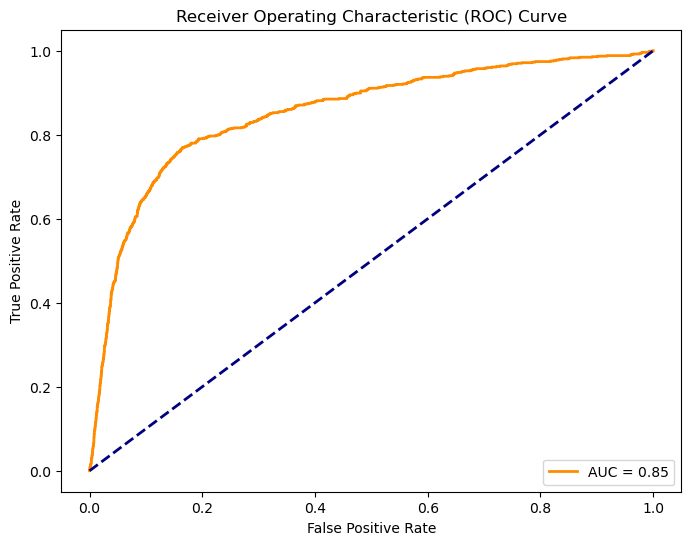

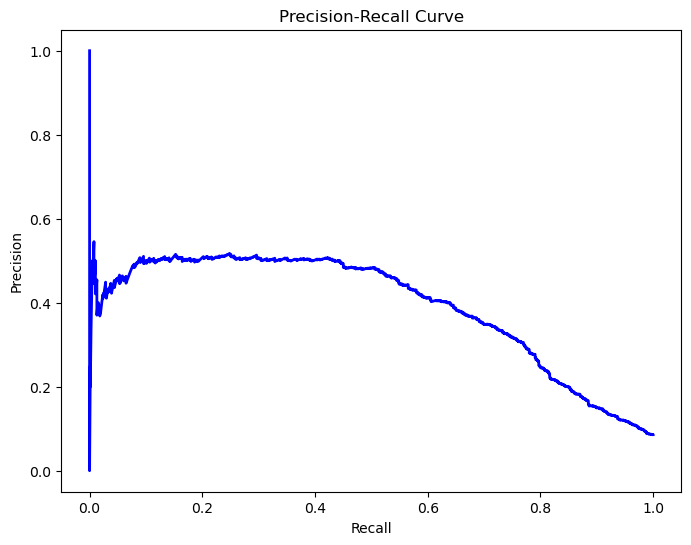

F1-Score: 0.3969


In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_recall_curve, f1_score
import matplotlib.pyplot as plt

# Train the logistic regression model on the balanced data
model_lr = LogisticRegression(random_state=42, max_iter=1000)
model_lr.fit(X_train_balanced, y_train_balanced)

# Predict probabilities for AUC-ROC and precision-recall evaluation
y_pred_prob = model_lr.predict_proba(X_test)[:, 1]
y_pred = model_lr.predict(X_test)

# 1. AUC-ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 2. Precision-Recall Curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# 3. F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.4f}")

## 4.3 Tune Hyperparameters with GridSearchCV or RandomizedSearchCV

Best Parameters: {'C': 100, 'max_iter': 100, 'solver': 'lbfgs'}


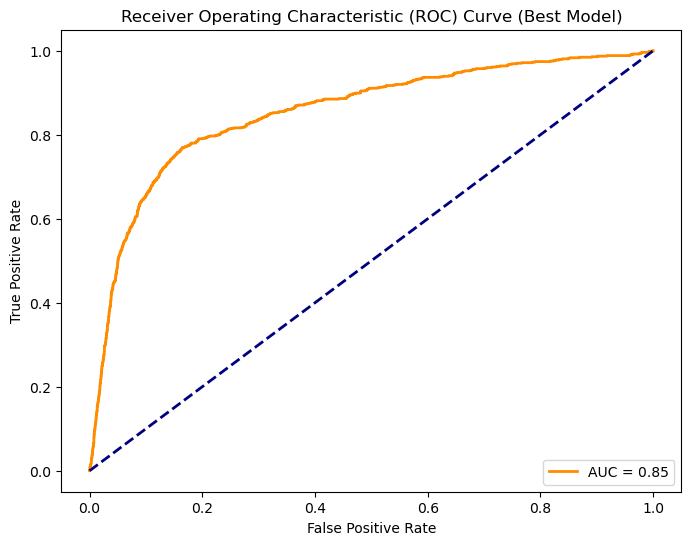

In [78]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 200, 300]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit grid search
grid_search.fit(X_train_balanced, y_train_balanced)

# Print best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model from grid search
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
y_pred_prob_best = best_model.predict_proba(X_test)[:, 1]

# Calculate the AUC-ROC for the tuned model
fpr_best, tpr_best, _ = roc_curve(y_test, y_pred_prob_best)
roc_auc_best = auc(fpr_best, tpr_best)

plt.figure(figsize=(8, 6))
plt.plot(fpr_best, tpr_best, color='darkorange', lw=2, label='AUC = %0.2f' % roc_auc_best)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Best Model)')
plt.legend(loc="lower right")
plt.show()